# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [2]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [4]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print 'data shape: ', X.shape
print 'label shape:', Y.shape

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

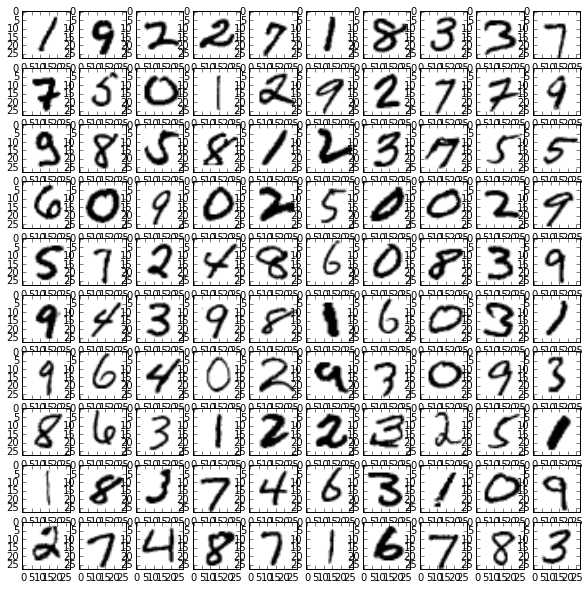

In [3]:
#/Users/danlucc/datasets/mnist/mldata/mnist-original.mat
def P1(num_examples=100):

### STUDENT START ###
    fig = plt.figure(figsize=(10,10))
    # loop to plot 10x10 grids
    for i in range(0,num_examples):
        plt.subplot(10,10,i+1)
        # show grids of numbers in black and white
        plt.imshow(X[i,:].reshape((28,28)),cmap=plt.cm.binary)

### STUDENT END ###

P1(100)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [6]:
def P2(k_values):

### STUDENT START ###
    # K-Nearest-Neighbor model for k=1
    knn = KNeighborsClassifier(n_neighbors=1)
    # fit using mini_train_data/labels
    knn.fit(mini_train_data, mini_train_labels)
    # use dev set for expected/predict
    expected = dev_labels
    predicted = knn.predict(dev_data)
    target_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
    # Classification Report for k=1 (precision, recall, F1 results)
    print "\nClassification Report for K-Nearest_Neighbor, k=1:\n"
    print classification_report(expected, predicted, target_names=target_names)
    # Report accuracy on dev set
    accuracy = knn.fit(mini_train_data, mini_train_labels).score(dev_data, dev_labels)
    print "Accuracy:\n", accuracy

    
### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)


Classification Report for K-Nearest_Neighbor, k=1:

             precision    recall  f1-score   support

          0       0.91      0.98      0.94        99
          1       0.89      1.00      0.94       105
          2       0.99      0.79      0.88       102
          3       0.77      0.87      0.82        86
          4       0.89      0.82      0.85       104
          5       0.93      0.84      0.88        91
          6       0.94      0.96      0.95        98
          7       0.89      0.92      0.90       113
          8       0.94      0.88      0.91        96
          9       0.78      0.82      0.80       106

avg / total       0.89      0.89      0.89      1000

Accuracy:
0.888


ANSWER: Accuracy on the dev set is 0.888. For k=1, each label's precision, recall, and F1 can be found in the Classification Report output. If we define the "most difficult digit" to be the digit with the lowest F1 (weighted average of precision and recall), then '9' is the most difficult digit. However, if we define the most difficult digit to be the digit with the lowest precision, then '3' is the most difficult digit. Since F1 takes into account both precision and recall, my final answer is that '9' is the most difficult digit.

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [72]:
def P3(train_sizes, accuracies):

### STUDENT START ###
    # K-Nearest-Neighbor model for k=1
    knn = KNeighborsClassifier(n_neighbors=1)
    # fit using mini_train_data/labels
    knn.fit(mini_train_data, mini_train_labels)
    # use dev set for expected/predict
    expected = dev_labels
    predicted = knn.predict(dev_data)
    target_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
    # Classification Report for k=1 (precision, recall, F1 results)
    print "\nClassification Report for K-Nearest_Neighbor, k=1:\n"
    print classification_report(expected, predicted, target_names=target_names)
    # loop through list of training set sizes
    for i in train_sizes:
        # Create train_size_data/labels based on each training set size
        train_size_data, train_size_labels = X[:i], Y[:i]
        # Append accuracy for each training set size to accuracies list
        accuracies.append(knn.fit(train_size_data, train_size_labels).score(dev_data, dev_labels))
        # Print time for each training set size
        print "Time:\n",time.time()
    # Print accuracies list
    print "Accuracies:\n",accuracies

### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
P3(train_sizes, accuracies)


Classification Report for K-Nearest_Neighbor, k=1:

             precision    recall  f1-score   support

          0       0.91      0.98      0.94        99
          1       0.89      1.00      0.94       105
          2       0.99      0.79      0.88       102
          3       0.77      0.87      0.82        86
          4       0.89      0.82      0.85       104
          5       0.93      0.84      0.88        91
          6       0.94      0.96      0.95        98
          7       0.89      0.92      0.90       113
          8       0.94      0.88      0.91        96
          9       0.78      0.82      0.80       106

avg / total       0.89      0.89      0.89      1000

Time:
1434324725.33
Time:
1434324725.53
Time:
1434324725.92
Time:
1434324726.84
Time:
1434324728.54
Time:
1434324731.8
Time:
1434324738.77
Time:
1434324754.75
Time:
1434324788.56
Accuracies:
[0.71999999999999997, 0.78600000000000003, 0.84099999999999997, 0.88400000000000001, 0.90200000000000002, 0.926000000

(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

In [85]:
def P4():

### STUDENT START ###
    # Create a linear regression object
    regr = LinearRegression()
    # Fit the model using training sets because we are already set n=60000
    regr.fit(train_data, train_labels)
    # Print the regression coefficients
    print('Coefficients: \n', regr.coef_)
    # Print the mean square error
    print("Residual sum of squares: %.2f"
          % np.mean((regr.predict(train_data) - train_labels) ** 2))
    # Print the explained variance score (1 is perfect prediction)
    print('Variance score: %.2f' % regr.score(train_data, train_labels))

### STUDENT END ###

P4()

('Coefficients: \n', array([  0.00e+00,   6.20e+11,  -3.74e+12,   1.07e+12,   1.33e+11,
        -3.01e+12,  -1.23e+12,  -5.04e+12,  -1.13e+12,  -5.34e+12,
        -5.10e+12,   8.71e+12,   8.76e+12,   2.53e+12,  -3.16e+12,
         5.47e+12,   7.62e+12,  -1.39e+12,   1.71e+12,   1.78e+12,
        -1.33e+12,  -1.28e+13,  -2.85e+12,  -2.43e+11,  -7.86e+12,
         4.93e+12,   6.00e+11,  -8.84e+11,   4.96e+12,   8.44e+11,
        -4.15e+12,   4.07e+12,  -5.69e+10,  -5.83e+01,   6.84e+00,
        -2.93e+00,   3.92e-01,   7.36e-01,  -1.63e-01,   1.69e-01,
        -2.56e-01,   3.06e-01,  -5.96e-02,   6.35e-01,  -6.87e-01,
         3.37e-01,   3.47e-01,   2.30e-03,   4.57e-01,   7.01e-01,
        -1.65e+00,   2.40e+00,  -4.93e+11,   3.12e+11,   1.43e+12,
         2.23e+12,  -1.66e+12,  -5.23e+11,   1.75e+02,  -2.47e+01,
         3.16e+00,  -3.48e+00,   9.82e-01,   4.47e-01,   1.08e+00,
         1.29e-01,   6.62e-01,   3.96e-01,   4.77e-01,   5.53e-01,
         5.60e-01,   1.39e-01,   6.90e-01

ANSWER: For training size n=60000, our regression model predicts an accuracy of 3.18. Obviously this can't be right, since the highest possible is 1. Using a logit function instead of linear regression would force to 0-1.

Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

Confusion matrix
[[ 97   0   0   0   0   0   2   0   0   0]
 [  0 105   0   0   0   0   0   0   0   0]
 [  4   4  81   4   0   0   0   4   3   2]
 [  1   0   0  75   0   3   0   3   1   3]
 [  0   2   0   0  85   0   3   0   0  14]
 [  2   0   0   9   0  76   0   1   1   2]
 [  1   1   1   0   1   0  94   0   0   0]
 [  1   4   0   1   1   0   0 104   0   2]
 [  0   2   0   5   0   2   1   0  84   2]
 [  1   0   0   3   9   1   0   5   0  87]]


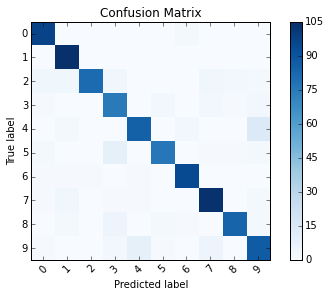

In [86]:
def P5():

### STUDENT START ###
    # Define function to plot confusion matrix on a blue scale
    def plot_confusion_matrix(cm, title='Confusion Matrix', cmap=plt.cm.Blues):
        # Show each plot
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        target_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
    # Fit K-Nearest-Neighbors model for k=1
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(mini_train_data, mini_train_labels)
    expected = dev_labels
    predicted = knn.predict(dev_data)
    target_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
    # Create confusion matrix to compare expected, predicted
    cm = confusion_matrix(expected, predicted)
    # Set precision to 2
    np.set_printoptions(precision=2)
    # Print values of confusion matrix for reference
    print('Confusion matrix')
    print(cm)
    # Plot confusion matrix by calling the function defined above
    plt.figure()
    plot_confusion_matrix(cm)
    
### STUDENT END ###

P5()

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

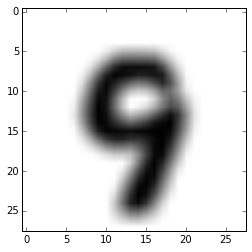

In [6]:
import scipy
from scipy import ndimage
def P6():
    
### STUDENT START ###
    # Create kernel using numpy
    kernel = np.ones((1,3,3))
    # Implement simplified Guassian blur filter using scipy
    blurred = scipy.ndimage.filters.convolve(mini_train_data.reshape((1000,28,28)), kernel)
    # Plot blurred image
    plt.imshow(blurred[1].reshape((28,28)),cmap=plt.cm.binary)
### STUDENT END ###

P6()

ANSWER:

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [105]:
def P7():

### STUDENT START ###
    # Use binarize argument to fit Bernoulli NB and map pixel values to either 0 or 1
    clfB = BernoulliNB(alpha=1.0, binarize=0.333)
    clfB.fit(mini_train_data, mini_train_labels)
    # Use dev_labels/data for expected/predicted
    expectedB = dev_labels
    predictedB = clfB.predict(dev_data)
    target_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
    print "\nClassification Report for Naive Bayes BernoulliNB:\n"
    # Print Classification Report for Bernoulli NB
    print classification_report(expectedB, predictedB, target_names=target_names)
    # Calculate and print accuracy for Bernoulli NB
    accuracyB = clfB.fit(mini_train_data, mini_train_labels).score(dev_data, dev_labels)
    print "BernoulliNB Accuracy:\n", accuracyB
    
    # Trinarize to map pixel values to either 0, 1, or 2
    trinarize = np.vectorize(lambda x: 0 if x <= 0.33 else 1 if (x > 0.33 and x<=0.67) else 2)
    # Create new training data using trinarized pixels
    multi_class_train_data = trinarize(mini_train_data)
    # Fit Multinomial NB
    clfM = MultinomialNB(alpha=1.0)
    # Use trinarized data
    clfM.fit(multi_class_train_data, mini_train_labels)
    # Use dev_labels/data for expected/predicted
    expectedM = dev_labels
    predictedM = clfM.predict(dev_data)
    target_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
    # Print Classification Report for Multinomial NB
    print "\nClassification Report for Naive Bayes MultinomialNB:\n"
    print classification_report(expectedM, predictedM, target_names=target_names)
    # Calculate and print accuracy for Multinomial NB
    accuracyM = clfM.fit(multi_class_train_data, mini_train_labels).score(dev_data, dev_labels)
    print "MultinomialNB Accuracy:\n", accuracyM

    
### STUDENT END ###

P7()


Classification Report for Naive Bayes BernoulliNB:

             precision    recall  f1-score   support

          0       0.89      0.97      0.93        99
          1       0.86      0.95      0.90       105
          2       0.85      0.79      0.82       102
          3       0.62      0.76      0.68        86
          4       0.91      0.77      0.83       104
          5       0.86      0.62      0.72        91
          6       0.91      0.88      0.89        98
          7       0.91      0.79      0.84       113
          8       0.75      0.80      0.78        96
          9       0.69      0.84      0.76       106

avg / total       0.83      0.82      0.82      1000

BernoulliNB Accuracy:
0.819

Classification Report for Naive Bayes MultinomialNB:

             precision    recall  f1-score   support

          0       0.90      0.96      0.93        99
          1       0.89      0.92      0.91       105
          2       0.85      0.80      0.82       102
          3 

ANSWER: While Bernoulli NB has an accuracy of 0.819, Multinomial NB has an accuracy of 0.797. Thus, the multi-class version does not improve results because in this dataset we are really looking at the binary state of pixels (white or not). Since the mult-class version uses more possibilities (grey, black, etc.), it is not the most apt situation to use Multinomial NB.

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [41]:
def P8(alphas):

### STUDENT START ###
    # our Bernoulli NB model
    clfB = BernoulliNB(alpha=1.0, binarize=0.333)
    # use the Bernoulli NB model as estimator for GridSearchCV, passing in alphas
    nb = GridSearchCV(estimator=clfB, param_grid=alphas)
    # fit using mini_train_data/labes
    nb.fit(mini_train_data, mini_train_labels)
    # show each grid score
    #print "Grid Scores:\n",nb.grid_scores_
    # show the best score
    print "Best Score:\n",nb.best_score_
    # show the best alpha estimator
    print "Best Alpha Estimator:\n",nb.best_estimator_.alpha
    return nb


### STUDENT END ###

alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)

Best Score:
0.826
Best Alpha Estimator:
0.01


In [34]:
print nb.best_params_

{'alpha': 0.01}


ANSWER: The best value for alpha is alpha = 0.01, yielding a score of 0.826. Meanwhile, alpha = 0 has an accuracy of 0.09200. This is what I would expect because alpha is a constant that multiplies the regularization term. When alpha = 0, the regularization term is also multiplied to 0.

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

GaussianNB Accuracy Before Changing Sigma: 0.63


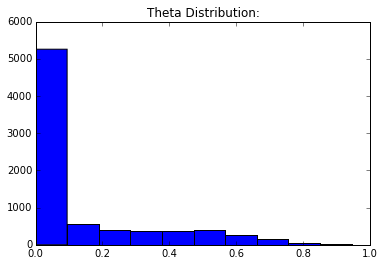

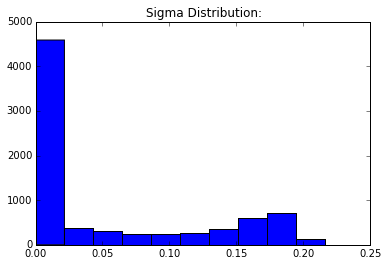

GaussianNB Accuracy After Changing Sigma: 0.79


In [139]:
def P9():

### STUDENT END ###
    # Train our model using GaussianNB
    gnb = GaussianNB()
    # Fit the model using mini_train_data/labels
    gnb.fit(mini_train_data, mini_train_labels)
    # Calculate and print the accuracy of our model (before changing sigma) using dev_data/labels
    score = gnb.score(dev_data, dev_labels)
    print "GaussianNB Accuracy Before Changing Sigma: %0.2f" % (score,)
    # Get thetas and sigmas to plot
    ts = gnb.theta_.reshape(len(gnb.theta_) * len(gnb.theta_[1]))
    ss = gnb.sigma_.reshape(len(gnb.sigma_) * len(gnb.sigma_[1]))
    # Plot histogram to show spike in theta distriubtion
    plt.title("Theta Distribution:")
    plt.hist(ts)
    plt.show()
    # Plot histogram to show spike(s) in sigma distriubtion
    plt.title("Sigma Distribution:")
    plt.hist(ss)
    plt.show() 
    # Add 0.01 to sigma to increase the variance based on distribution
    gnb.sigma_ += 0.01
    # Calculate and print the accuracy of our model (after changing sigma) using dev_data/labels
    score = gnb.score(dev_data, dev_labels)
    print "GaussianNB Accuracy After Changing Sigma: %0.2f" % (score,)  
    return gnb
### STUDENT END ###

gnb = P9()

ANSWER: When we train our original model using GaussianNB, we see an accuracy of only 0.63. However, when we plot the distribution of our model's thetas/sigmas, we see spikes in the sigma distribution between 0.15 and 0.2. Thus we need to increase sigma slightly (to have the effect of "adding noise"). After we add 0.01 to sigma, we see that the accuracy of our GaussianNB model increases to 0.79, which is close to the accuracy of our BernoulliNB model.

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

In [7]:
#def P10(num_examples=20):

### STUDENT START ###


### STUDENT END ###

#P10(20)

ANSWER:

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [10]:
def P11(buckets, correct, total):
    
### STUDENT START ###
    bnb = BernoulliNB(alpha=1)
    return bnb

                
### STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print 'p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy)
    print bnb.predict(dev_data[0])
    print bnb.predict_proba(dev_data[0])

p(pred) <= 0.5000000000000    total =   0    accuracy = 0.000


NameError: name 'bnb' is not defined

ANSWER:

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [18]:
#def P12():

### STUDENT START ###


### STUDENT END ###

#P12()